In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns',200)


In [2]:
df=pd.read_csv('mixed.csv')


In [3]:
df.shape

(5000, 10)

In [4]:
df.describe()

Age  Difficulty Breathing        Cough      Fatigue  \
count  5000.000000           5000.000000  5000.000000  5000.000000   
mean     40.629600              0.579600     0.579200     0.583400   
std      22.954054              0.493673     0.493737     0.493045   
min       1.000000              0.000000     0.000000     0.000000   
25%      21.000000              0.000000     0.000000     0.000000   
50%      41.000000              1.000000     1.000000     1.000000   
75%      60.000000              1.000000     1.000000     1.000000   
max      80.000000              1.000000     1.000000     1.000000   

             Fever    Headache       Nausea  
count  5000.000000  5000.00000  5000.000000  
mean      0.576400     0.41540     0.577600  
std       0.494178     0.49284     0.493991  
min       0.000000     0.00000     0.000000  
25%       0.000000     0.00000     0.000000  
50%       1.000000     0.00000     1.000000  
75%       1.000000     1.00000     1.000000  
max       1.000000     1.00000     1.000000

In [5]:
df['Date']=pd.to_datetime(df['Date'])


In [6]:
df.dtypes

Date                    datetime64[us]
City                               str
Age                              int64
Difficulty Breathing             int64
Cough                            int64
Fatigue                          int64
Fever                            int64
Headache                         int64
Nausea                           int64
Disease                            str
dtype: object

In [7]:
df=df.rename(columns={'disease':'Disease',
                   'cough':'Cough',
                   'fatigue':'Fatigue',
                   'fever':'Fever',
                   'headache':'Headache',
                   'nausea':'Nausea'})
df

Date        City  Age  Difficulty Breathing  Cough  Fatigue  Fever  \
0    2024-09-15     Chennai   62                     1      1        0      0   
1    2024-06-21  Coimbatore   37                     0      1        0      1   
2    2024-02-25     Madurai   62                     1      1        1      0   
3    2024-06-28     Chennai    3                     1      1        0      0   
4    2024-11-26     Chennai   52                     1      1        0      0   
...         ...         ...  ...                   ...    ...      ...    ...   
4995 2024-05-18       Salem   49                     1      1        1      1   
4996 2024-09-13     Chennai   59                     0      0        1      1   
4997 2024-06-25     Madurai   18                     0      0        0      0   
4998 2024-02-22     Madurai    8                     1      1        0      0   
4999 2024-09-23     Madurai   71                     0      0        0      0   

      Headache  Nausea          Disease  
0            0       1           Asthma  
1            0       1        Pneumonia  
2            0       1        Pneumonia  
3            0       1           Asthma  
4            1       1         Migraine  
...        ...     ...              ...  
4995         0       0        Influenza  
4996         1       0  Gastroenteritis  
4997         1       1         Migraine  
4998         0       1           Asthma  
4999         1       1         Migraine  

[5000 rows x 10 columns]

In [8]:
df.to_csv('dataset_final.csv',index=False)

In [9]:
df.isna().sum()

Date                    0
City                    0
Age                     0
Difficulty Breathing    0
Cough                   0
Fatigue                 0
Fever                   0
Headache                0
Nausea                  0
Disease                 0
dtype: int64

In [10]:
df['Disease'] = df['Disease'].str.replace('diabetes', 'Diabetes')
df['Disease'] = df['Disease'].str.replace('hypertension', 'Hypertension')

<Axes: title={'center': 'N0. of people infected by particular disease'}, xlabel='Disease'>

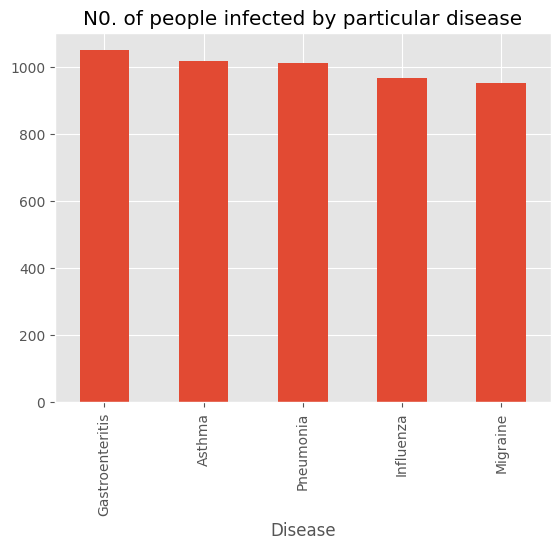

In [11]:
df['Disease'].value_counts() \
.head(10)\
.plot(kind='bar',title="N0. of people infected by particular disease")

<Axes: xlabel='Disease', ylabel='Age'>

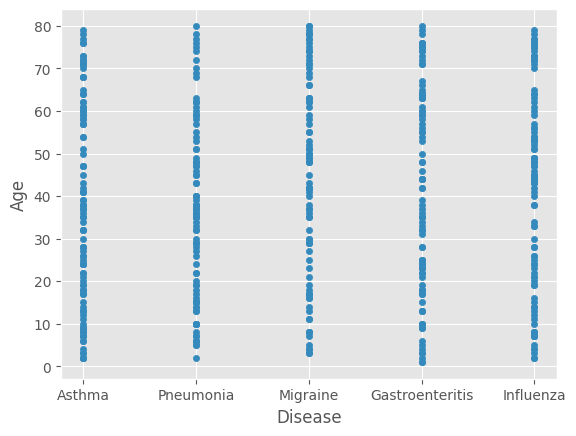

In [12]:
df.head(500).plot(kind="scatter",x="Disease",y='Age')

<Axes: xlabel='Disease', ylabel='Age'>

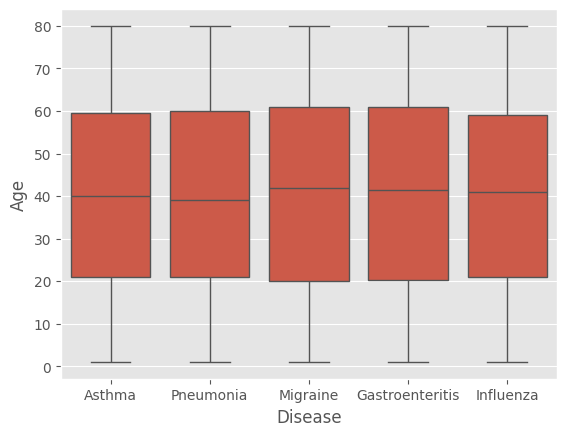

In [13]:
sns.boxplot(x='Disease', y='Age', data=df)


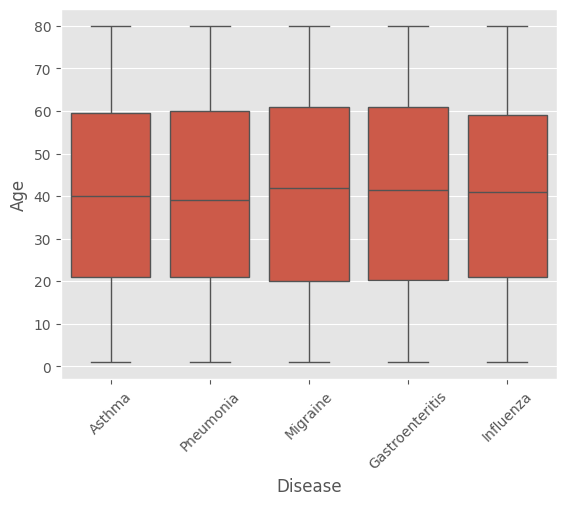

In [14]:
top_diseases = df['Disease'].value_counts().nlargest(10).index
filtered_df = df[df['Disease'].isin(top_diseases)]
sns.boxplot(x='Disease', y='Age', data=filtered_df)
plt.xticks(rotation=45)
plt.show()


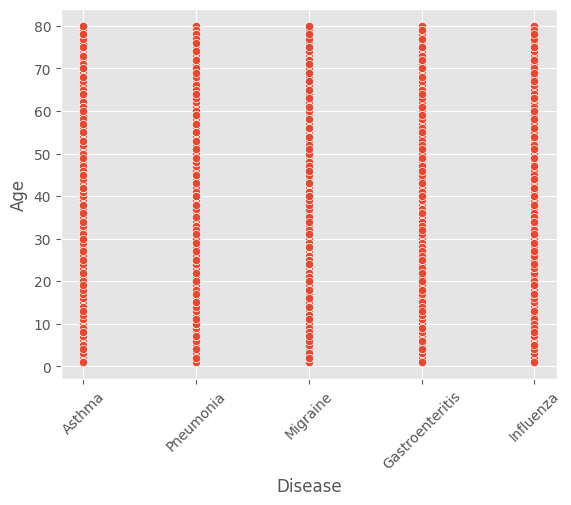

In [15]:
top_diseases = df['Disease'].value_counts().nlargest(10).index
filtered_df = df[df['Disease'].isin(top_diseases)]
sns.scatterplot(x='Disease', y='Age', data=filtered_df)
plt.xticks(rotation=45)
plt.show()